# Mathematik für Biologiestudierende II

Sommersemester 2025

01.07.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Klausur

* Sie können sich jetzt im [Studierendenportal](https://studierende.hhu.de) zur Klausur am 05.08.2025 anmelden.
* Die Klausur dauert 120 Minuten.

# Termine

* 08.07.2025 letzte Vorlesung
* 15.07.2025 Probeklausur (im Vorlesungsformat)
* 05.08.2025 erste Klausur
* 16.09.2025 zweite Klausur
* Februar 2026 dritte Klausur

* möglicherweise wird Anfang September ein Ferientutoriumm angeboten:  Schauen Sie auf die [Webseite](https://www.math.uni-duesseldorf.de/~internet/bio2425/)

# Themen

* Lineare Modelle mit kategoriellen Daten
* ANOVA als lineares Modell
* Regression im exponentiellen Modell
* halblogarithmische Darstellung

In [2]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()
import statsmodels.formula.api as smf

# Lineare Modelle mit kategoriellen Daten

#### Beispiel Ratten

Wir kommen zu dem Rattenbeispiel aus Lektion 23 zurück:

* kontaminiertes Gelände: fange 10 Ratten
* unbelastetes Vergleichsgelände:  fange 10 Ratten
* für jede Ratte wird ihr Alter in Monaten und der Bleigehalt im Gewebe bestimmt

In [3]:
df = pd.read_csv('ratten.csv')

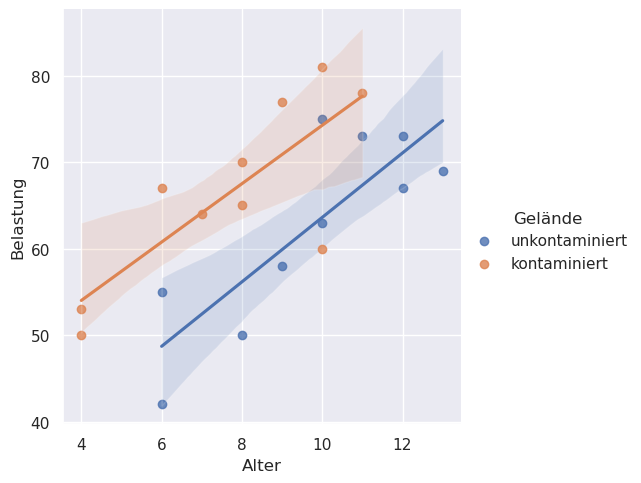

In [20]:
sns.lmplot(df, x='Alter', y='Belastung', hue='Gelände');

In [4]:
formel = 'Belastung ~ Alter + Gelände'
modell = smf.ols(formel, df)
res = modell.fit()

In [5]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Belastung   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     17.52
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           7.42e-05
Time:                        08:43:55   Log-Likelihood:                -63.935
No. Observations:                  20   AIC:                             133.9
Df Residuals:                      17   BIC:                             136.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    39.1728      5.166      7.583      0.000      28.273      50.072
Gelände[T.unkontaminiert]   -11.0980      3.124     -3.552      0.002     -17.689      -4.507
Alter                         3.5490      0.617      5.752      0.000       2.247       4.851
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.408
Skew:                          -0.346   Prob(JB):                        0.815
Kurtosis:                       3.102   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bestimmung des p-Werts

* `res.summary` gibt den *p*-Wert für den Intercept aus
* also für den Unterschied im Alter 0

* Trick:  Verlegung des Nullpunkts
* Im Beispiel verlegen wird den Nullpunkt auf 8 Monate.
* Wir führen in der Tabelle also eine Spalte mit der Altersdifferenz zu 8 Monaten ein

In [6]:
df['Altersdifferenz'] = df.Alter - 8
df.head()

,Alter,Belastung,Gelände,Altersdifferenz
0,10,63,unkontaminiert,2
1,12,67,unkontaminiert,4
2,6,55,unkontaminiert,-2
3,6,42,unkontaminiert,-2
4,11,73,unkontaminiert,3


In [7]:
formel2 = 'Belastung ~ Altersdifferenz + Gelände'
modell2 = smf.ols(formel2, df)
res2 = modell2.fit()

In [9]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Belastung   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     17.52
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           7.42e-05
Time:                        08:50:53   Log-Likelihood:                -63.935
No. Observations:                  20   AIC:                             133.9
Df Residuals:                      17   BIC:                             136.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    67.5647      2.038     33.154      0.000      63.265      71.864
Gelände[T.unkontaminiert]   -11.0980      3.124     -3.552      0.002     -17.689      -4.507
Altersdifferenz               3.5490      0.617      5.752      0.000       2.247       4.851
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.408
Skew:                          -0.346   Prob(JB):                        0.815
Kurtosis:                       3.102   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* der *p*-Wert für den Einfluss des geländes bei acht Monate alten Ratten beträgt 0.002
* in der letzten Lektion hatten wir durch Betrachtung der Konfidenzintervalle der Prediction einen *p*-Wert von 0.02 gesehen

# ANOVA als Lineares Modell

In [10]:
df = pd.read_csv("http://reh.math.uni-duesseldorf.de/~braun/bio2425/zitronen.csv")

In [11]:
df.head()

,Vitamin_C_Gehalt,Land
0,494.5,Spanien
1,499.2,Spanien
2,494.3,Spanien
3,478.0,Spanien
4,500.1,Spanien


In [49]:
df.Land.value_counts()

Land
Spanien         8
Italien         8
Griechenland    8
Marokko         8
Indien          8
Name: count, dtype: int64

In [51]:
import statsmodels.stats.anova as smf_anova

In [50]:
formel = "Vitamin_C_Gehalt ~ Land"
modell = smf.ols(formel, df)
res = modell.fit()

In [52]:
smf_anova.anova_lm(res)

,df,sum_sq,mean_sq,F,PR(>F)
Land,4.0,4378.44650,1094.611625,11.873758,0.000003
Residual,35.0,3226.56125,92.187464,NaN,NaN


* Der *p*-Wert ist derselbe wie in Lektion 17
* Die Nachkommastellen des *p*-Werts sehen wir wie folgt

In [54]:
tabelle = smf_anova.anova_lm(res)

In [55]:
tabelle['PR(>F)'].Land

3.3733416696759452e-06

Die gemäß Bonferroni-Holm korrigierten *p*-Werte für die Paarvergleiche erhalten wir wie in Lektion 17

In [59]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [60]:
muc = MultiComparison(df.Vitamin_C_Gehalt, df.Land)

In [58]:
res = muc.allpairtest(stats.ttest_ind, method='holm')
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0019,True
Griechenland,Italien,1.113,0.2845,0.5689,False
Griechenland,Marokko,-3.5339,0.0033,0.0231,True
Griechenland,Spanien,-1.9478,0.0718,0.2153,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,0.7549,False
Indien,Spanien,3.3226,0.005,0.0302,True
Italien,Marokko,-4.3312,0.0007,0.0055,True
Italien,Spanien,-3.3042,0.0052,0.0302,True
Marokko,Spanien,2.2786,0.0389,0.1556,False


Das sind andere Zahlen als bei `res.summary`, weil `res.summary` die Treatments nur mit dem Default vergleicht und nicht untereinander

# Regression im exponentiellen Modell

## Beispiel Covid-Erkrankungen

In [62]:
df = pd.read_csv('corona.csv')
df.head()

,Tag (im März),Anzahl
0,3,38
1,4,52
2,5,109
3,6,185
4,7,150


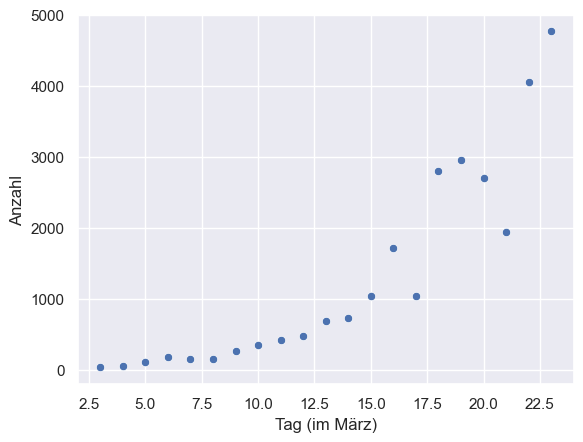

In [63]:
ax = sns.scatterplot(data=df, x="Tag (im März)", y="Anzahl");

* Das Wachstum war exponentiell
* Es gab aber Schankungen durch unterschiedliche Verzögerungen der Berichte der Gesundheitsämter

# Halblogarithmische Darstellung

Bei halblogarithmischer Darstellung

* ist die $x$-Achse linear skaliert: Gleiche absolute Zuwächse pro Längeneinheit
* ist die $y$-Achse logarithmisch skaliert: Gleiche relative Zuwächse pro Längeneinheit
* Das bedeutet:  Der Logarithmus der Daten wird angezeigt, und die $y$-Achse wird entsprechend unterteilt
* Exponentiell wachsende Daten liegen bei halblogarithmischer Darstellung annäherend auf einer wachsenden Geraden, exponentiell fallende auf einer fallenden Geraden

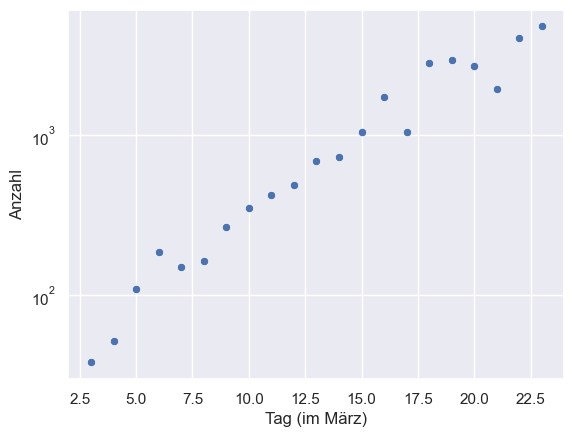

In [64]:
ax.set_yscale('log')
ax.figure

## Exponentielles Modell vs. Lineare Regression

* Lineares Modell: in gleichen Zeitabständen gleiche absolute Zuwächse
* Exponentielles Modell: in gleichen Zeitabständen gleiche relative Zuwächse
* Biologische Wachstums- oder Abklingprozesse verlaufen meistens exponentiell
* Aufgabe der Regression im exponentiellen Modell ist es, bei Wachstumsprozessen die Verdoppelungszeit und bei    Abklingprozessen die Halbwertszeit zu bestimmen

* Dies geschieht, indem man die Werte logarithmiert und dann deren lineare Regression berechnet

## Regression im exponentiellen Modell

* $x$ die Zeit, $z$ Daten, die exponentiell wachsen (bzw. abklingen)
* Modellgleichung für Wachstumsprozess: 
$$      z = c \cdot e^{m\cdot x}  $$
* logarithmierte Modellgleichung
$$      y = \ln(z) = \ln(c) + m \cdot x  $$

* bestimme diese Gerade durch lineare Regression
* wenn $m < 0$, dann Abklingprozess

In [65]:
df['logAnzahl'] = np.log(df.Anzahl)
df['Tag'] = df['Tag (im März)']

In [66]:
formel = 'logAnzahl ~ Tag'
modell = smf.ols(formel, df)
res = modell.fit()

In [67]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logAnzahl   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     458.1
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           9.25e-15
Time:                        10:32:36   Log-Likelihood:                -2.9636
No. Observations:                  21   AIC:                             9.927
Df Residuals:                      19   BIC:                             12.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4410      0.151     22.728      0.000       3.124       3.758
Tag            0.2260      0.011     21.403      0.000       0.204       0.248
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.816
Skew:                          -0.438   Prob(JB):                        0.665
Kurtosis:                       2.594   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* m = 0.226
* b = 3.441

Die Regressionsgerade für die logarithmierten Daten ist
$$  y = 0.226 \cdot x + 3.441
$$

In [69]:
tage = np.arange(3, 24)
gerade = 0.226*tage + 3.441

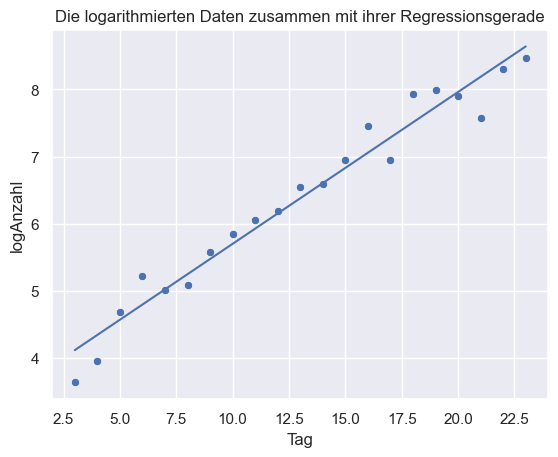

In [70]:
titel = "Die logarithmierten Daten zusammen mit ihrer Regressionsgerade"
ax2 = sns.scatterplot(x=df.Tag, y=df.logAnzahl)
sns.lineplot(x=tage, y=gerade)
ax2.set_title(titel);

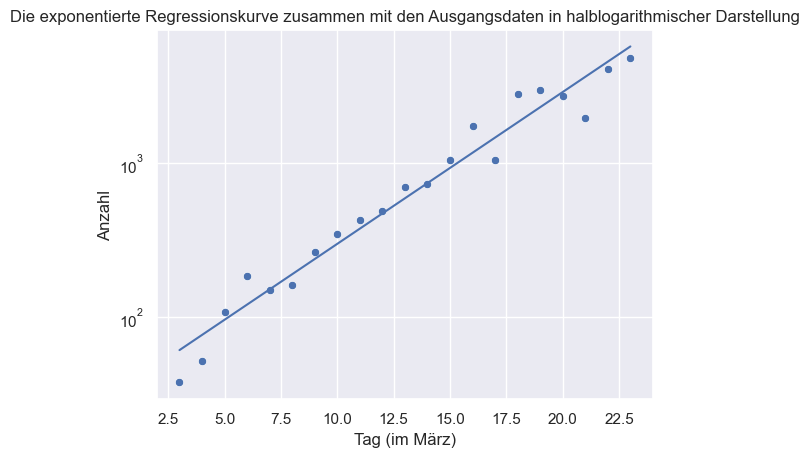

In [71]:
titel = "Die exponentierte Regressionskurve zusammen mit den Ausgangsdaten in halblogarithmischer Darstellung"
sns.lineplot(x=tage, y=np.exp(gerade), ax=ax)
ax.set_title(titel)
ax.figure

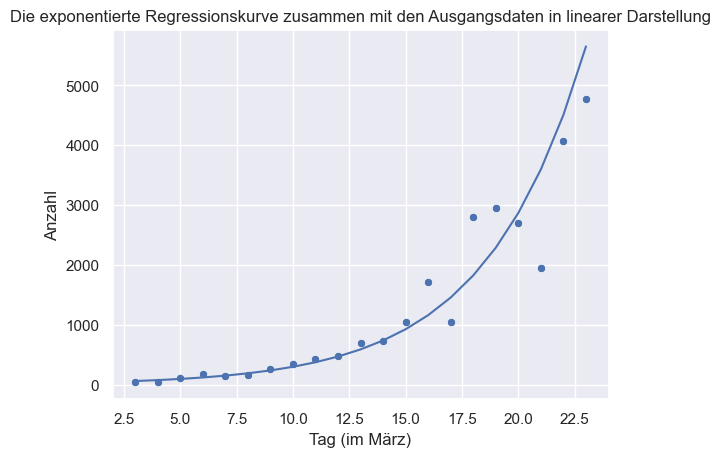

In [72]:
titel = "Die exponentierte Regressionskurve zusammen mit den Ausgangsdaten in linearer Darstellung"
ax.set_title(titel)
ax.set_yscale('linear')
ax.figure

# Halbwerts- bzw. Verdoppelungszeit

(aus Lektion 2)

* Modell eines Wachstumsprozesses
$$      z = c \cdot e^{m\cdot x}  $$
* Verdoppelungszeit $t$ bestimmt durch
$$      e^{m\cdot t} = 2   $$
* Also
$$      t = \frac{\ln 2}m  $$
* Bei Abklingprozessen ist $m < 0$, dann ist
$$     t = -\frac{\ln 2}m  $$
    die Halbwertszeit
    

Im Beispiel Covid

In [73]:
m = 0.226

In [74]:
t = np.log(2) / m
t

3.067022922831616

Die Verdoppelungszeit betrug 3.07 Tage